# Linear algebra

#### Third practical work, Monday,  October 12, 19 and 26, 2020
This third practical work covers the basics of linear algebra. We will see how to efficiently solve a large set of equation numerically and how to compute the normal frequencies of a vibrating system. 

As usual, first run the following cell to import the librairies used in this Notebook. If you get an error message, it's probably because the memory profiler is not installed. In that case, run in a terminal `pip3 install memory_profiler` (if it fails, comment the last line in the cell below)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.sparse as sps
from scipy.sparse.linalg import eigsh, eigs, bicg, factorized
from scipy.sparse.linalg.dsolve import linsolve

import random as rand
# %load_ext memory_profiler

### Exercise 1: solving a set of equations


Consider the following set of equations,

$$ 3x + 4y = -5,$$
$$ 2x - y  =4.$$

To obtain the solution x=1 and y=-2 numerically, it has to be recast under the form of a linear matrix equation MX = B, with

$$ M =  \begin{pmatrix} 3 & 4 \\2 & -1 \end{pmatrix}, ~~~ X = \begin{pmatrix} x \\ y \end{pmatrix}, ~~~ B = \begin{pmatrix} -5 \\ 4 \end{pmatrix}. $$

Once M and B are defined, only a single additional line of code is needed to get X. 

1. Create M and B for this example with the function `np.array` and print them
2. Compute X with [the direct *NumPy* solver](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) `np.linalg.solve` and print it


In [222]:
M = np.array([[3,4],[2,-1]])
B = np.array([[-5],[4]])

print("On définit la matrice M = ")
print(M)

print("\nOn définit la matrice B = ")
print(B)

X = np.linalg.solve(M, B)

print("\nLa solution du système MX = B, est X = ")
print(X)

On définit la matrice M = 
[[ 3  4]
 [ 2 -1]]

On définit la matrice B = 
[[-5]
 [ 4]]

La solution du système MX = B, est X = 
[[ 1.]
 [-2.]]


### Exercise 2: a first application in mechanics

We want to find the equilibrium positions of the two point-like particles sketched below.
<img src="add_files/TP3_1.png"  width="400" height="400" />


1. Correct the equations in the Markdown cell below to get the right set of equations to solve
2. Define the 2D array Q and the 1D array F with k=2.45, k'=1.43 and ℓ=0.12. You should find
$$Q =  \begin{pmatrix} 3.88 & -1.43 \\ -1.43 & 3.88 \end{pmatrix}, ~~~~ F = \begin{pmatrix} -0.0492 \\ 0.9312 \end{pmatrix}. $$
3. Use the direct NumPy solver `np.linalg.solve` to compute `X` 
4. Create a function `equi_pos(k,kp,l)` that returns the distance `D` between the two particles at equilibrium
5. Plot `D` as a function of `k` in the range 0.01 to 30 for fixed values of k'=1.43 and ℓ=0.12
6. Add to this plot the two theoretical asymptotes
\begin{align}
D &\simeq 2\ell \left( 1- \frac{k}{4k'} \right)&(k \ll k')\\
D &\simeq \ell \left( 1+ \frac{2k'}{k} \right)&(k \gg k')
\end{align}

$$Mq'' + Kq = F$$

As we study the static equilibrium case, we have q'' = 0 and so the springs' position is given by :

$$Kq = F$$

To solve the system provides values for q and so for the position (as q $\equiv$ x).

#### 1

**You must edit this cell in french or in english.**

On réalise un bilan des forces exercées sur la particule A :

* Le ressort lié au mur exerce sur A une force $\mathbf{F}_{A1} = - k (x_A - \ell) ~\mathbf{e}_x $
* Le ressort lié à B exerce sur A une force $\mathbf{F}_{A2} = - k' (x_A - x_B + 2\ell)~\mathbf{e}_x $
* La position d'équilibre de A est donc déduite d'un équilibre de ces forces, 
$$ \mathbf{F}_{A1}+\mathbf{F}_{A2} = \mathbf{0} \longrightarrow (k + k') x_A - k' x_B = (k - 2k')\ell$$

On réalise un bilan des forces exercées sur la particule B :
* Le ressort lié au mur exerce sur B une force $\mathbf{F}_{B1} = -k (x_B - 2\ell) ~\mathbf{e}_x $
* Le ressort lié à A exerce sur B une force $\mathbf{F}_{B2} = - k' (x_B - x_A - 2\ell)~\mathbf{e}_x $
* La position d'équilibre de B est donc déduite d'un équilibre de ces forces, 
$$ \mathbf{F}_{B1}+\mathbf{F}_{B2} = \mathbf{0} \longrightarrow - k' x_A + (k + k') x_B = 2(k + k') \ell$$

#### 2
Ces deux équations d'équilibre peuvent se mettre sous forme vectorielle,

$$QX = F,~~~~~~~ Q =  \begin{pmatrix} (k+k') & -k' \\ -k' & (k+k') \end{pmatrix}, ~~~ X = \begin{pmatrix} x_A \\ x_B \end{pmatrix}, ~~~ F = \begin{pmatrix} (k - 2k')\ell \\ 2(k + k') \ell \end{pmatrix}. $$

In [221]:
k = 2.45; k_p = 1.43; l = 0.12
Q = np.array([[k+k_p, -k_p], [-k_p, k+k_p]])
F = np.array([[(k - 2*k_p)*l],[(2*k + 2*k_p)*l]])

print("\nOn définit la matrice Q = ")
print(Q)

print("\nOn définit le vecteur F = ")
print(F)


On définit la matrice Q = 
[[ 3.88 -1.43]
 [-1.43  3.88]]

On définit le vecteur F = 
[[-0.0492]
 [ 0.9312]]


#### 3

In [223]:
# Solution system

X = np.linalg.solve(Q,F)

print("\nLa solution du système QX = F, est X = ")
print(X)


La solution du système QX = F, est X = 
[[0.08768362]
 [0.27231638]]


We have here, given the values for our parameters, the equilibrium positions

$$ [[x_A], \\
     [x_B]].$$

Here below, we provide a code returning the distance between the equilibrium positions.

#### 4

In [76]:
# Code returning distance x_B - x_A

k = 2.45; k_p = 1.43; l = 0.12

def equi_pos(k, k_p, l):

    # Matrix and vector for the system
    Q = np.array([[k + k_p, -k_p], [-k_p, k + k_p]])
    F = np.array([[(k - 2*k_p)*l],[2*(k + k_p)*l]])

    # Solution
    X = np.zeros([1,2])
    X = np.linalg.solve(Q, F)

    return X[1] - X[0]

D = equi_pos(k, k_p, l)
print(X)
print("Distance between equilibrium position : " + str(D) + "m")

[[0.12]
 [0.36]]
Distance between equilibrium position : [0.18463277]m


5. Plot `D` as a function of `k` in the range 0.01 to 30 for fixed values of k'=1.43 and ℓ=0.12
6. Add to this plot the two theoretical asymptotes
\begin{align}
D &\simeq 2\ell \left( 1- \frac{k}{4k'} \right)&(k \ll k')\\
D &\simeq \ell \left( 1+ \frac{2k'}{k} \right)&(k \gg k')
\end{align}
                               

#### 5

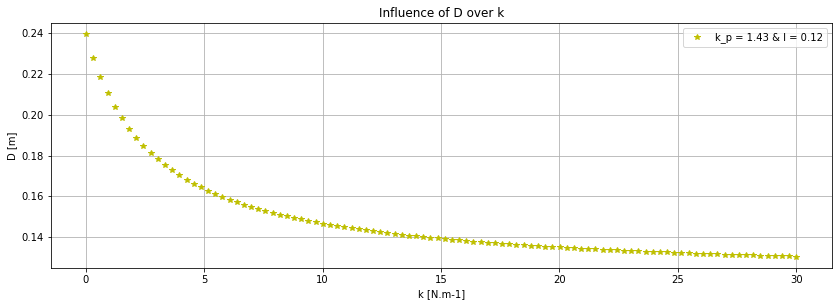

In [229]:
# Evolution distance equilibrium points in function of k = [0.01, 30]

fig = plt.figure(figsize=(14,4.5))

k_min = .01
k_max = 30
N     = 100

k = np.linspace(k_min, k_max, N)

for i in k:
    D = 0
    D = equi_pos(i, k_p, l)
    plt.plot(i, D, 'y*')
    
    plt.title('Influence of D over k')
    plt.xlabel('k [N.m-1]')
    plt.ylabel('D [m]')

plt.legend(["k_p = 1.43 & l = 0.12"], loc = 1)
    
plt.grid()

#### 6

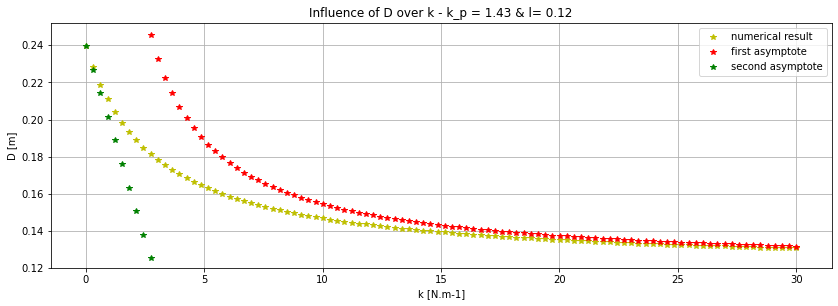

In [237]:
# Adding asymptots

k_p   = 1.43

fig = plt.figure(figsize=(14,4.5))

# ------------------------------------------------------

for i in k:
    D = 0
    D = equi_pos(i, k_p, l)
    
    asymp_1 = l*(1 + 2*k_p/i)      # k>>k'
    asymp_2 = 2*l*(1 - i/(4*k_p))  # k<<k'

    plt.plot(i, D, 'y*')
    plt.plot(i, asymp_1, 'r*')
    plt.plot(i, asymp_2, 'g*')
    
    plt.title('Influence of D over k - k_p = 1.43 & l= 0.12')
    plt.xlabel('k [N.m-1]')
    plt.ylabel('D [m]')
    
    plt.ylim([l, 2.1 * l])

plt.grid()

plt.legend(['numerical result', 'first asymptote', 'second asymptote'])

### Exercise 3: stiffness of several springs in series

We consider five point-like particles connected by springs of rest length ℓ and stiffness k=4, an external force F being applied at the very end of the chain.

<img src="add_files/TP3_2.png"  width="500" height="500" />

Denoting the position of the n<sup>th</sup> particle by x<sub>n</sub>=(n+1) ℓ + ξ<sub>n</sub>, the equilibrium deformations ξ<sub>n</sub> are given by 

\begin{align}
-2k \xi_0 + k \xi_1 &= 0\\
k\xi_0  - 2k \xi_1 + k \xi_2 &= 0\\
k\xi_1  - 2k \xi_2 + k \xi_3 &= 0\\
k\xi_2  - 2k \xi_3 + k \xi_4 &= 0\\
k\xi_3 - k \xi_4  &= -F\\
\end{align}

1. For a given force F = 0.1, compute the equilibrium deformations
2. Plot F as a function of the total extension ξ<sub>4</sub>. What is the equivalent stiffness of this system? Compare your value to the theoretical one (k/5).


In [317]:
# 5 springs system for 5 masses : K = [5x5]

F = 0.1
k = 4

Q = np.zeros([5,5])
Force = np.zeros([5,1])

# -------------------------------------------

# Building Q

for i in range(5-1):
    Q[i,i] = -2*k
    
for i in range(5-1):
    Q[i,i+1] = k
    Q[i+1,i] = k
    
Q[4,4] = -k

# -------------------------------------------

# Building Force vector
Force[4,0] = -F # other values are already 0

# -------------------------------------------

# Displaying matrix - vector

print("Building matrix Q : ")
print(Q)

print("\nBuilding vector F : ")
print(Force)

# -------------------------------------------

# Static equilibrium's positions

X = np.linalg.solve(Q, Force)

print("\nStatic equilibrium's positions : ")
print(X)

Building matrix Q : 
[[-8.  4.  0.  0.  0.]
 [ 4. -8.  4.  0.  0.]
 [ 0.  4. -8.  4.  0.]
 [ 0.  0.  4. -8.  4.]
 [ 0.  0.  0.  4. -4.]]

Building vector F : 
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [-0.1]]

Static equilibrium's positions : 
[[0.025]
 [0.05 ]
 [0.075]
 [0.1  ]
 [0.125]]


We have as a result springs spaced of 0.025*spring's position.
Therefore, the elongation of the springs increases when we get closer to F (right boundary).

Equivalent stiffness = 0.7999999999999998 while theoretical value equals 0.8


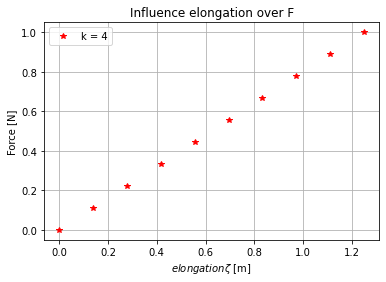

In [318]:
# Case zeta_4 over F
# zeta_4 = (x_4 - l) = elongation in static case

N = 10 # Number of forces to test (precision graph)

# force applied to the right boundary
F = np.linspace(0, 1, N)

for i in range(N):

    Force[4,0] = -F[i] # other values are already 0
    
    X = np.linalg.solve(Q, Force)
    plt.plot(X[4], F[i], 'r*')

plt.title('Influence elongation over F')
plt.xlabel(r'$elongation \zeta$ [m]')
plt.ylabel('Force [N]')

plt.legend(["k = 4"])

plt.grid()

# --------------------------------------------------
# --------------------------------------------------

# Equivalent stiffness

k = 4
F = 0.1

Force[4,0] = -F # other values are already 0
    
X = np.linalg.solve(Q, Force)

# --------------------------------------------------

k_theory = k/5
k_exp    = float(F/X[4])

print("Equivalent stiffness = " + str(k_exp) + " while theoretical value equals " + str(k_theory))

We therefore observe that the elongation evolves linearly with the force being applied to the concerned spring.

We furthermore note that for a zero force, there is no elongation, as expected for equilibrium.

By comparison with the other positions :

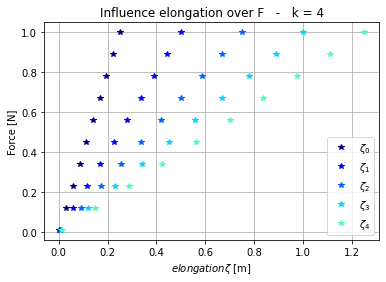

In [320]:
# Every zeta

N = 10 # Number of forces to test (precision graph)

# force applied to the right boundary
F = np.linspace(0.01, 1, N)

for i in range(N):

    Force[4,0] = -F[i] # other values are already 0
    
    X = np.linalg.solve(Q, Force)
    
    jet= plt.get_cmap('jet')
    colors = iter(jet(np.linspace(0,1,N)))

    for j in range(np.size(X)):
        plt.plot(X[j], F[i], '*', color=next(colors))

        
plt.title('Influence elongation over F   -   k = 4')
plt.xlabel(r'$elongation \zeta$ [m]')
plt.ylabel('Force [N]')
        
plt.legend(["$\zeta_0$", "$\zeta_1$", "$\zeta_2$", "$\zeta_3$", "$\zeta_4$"], loc = 4)

plt.grid()

In [321]:
# Equivalent stifness for every springs

k = 4
F = 0.1

Force[4,0] = -F # other values are already 0
    
X = np.linalg.solve(Q, Force)

k_theory = [k/1, k/2, k/3, k/4, k/5]
k_exp    = F/X

for i in range(np.size(k_theory)):
    print("Equivalent stiffness  = " + str(float(k_exp[i])) + " for x" + str(i) + " while theoretical value equals " + str(k_theory[i]) + "\n")

Equivalent stiffness  = 3.9999999999999996 for x0 while theoretical value equals 4.0

Equivalent stiffness  = 1.9999999999999998 for x1 while theoretical value equals 2.0

Equivalent stiffness  = 1.3333333333333333 for x2 while theoretical value equals 1.3333333333333333

Equivalent stiffness  = 0.9999999999999999 for x3 while theoretical value equals 1.0

Equivalent stiffness  = 0.7999999999999998 for x4 while theoretical value equals 0.8



The above graph confirms the fact that for the same stiffness, the elongation is bigger closer to the force F.

Looking at the equivalent stiffness, they are quiet close from theoretical one.

### Exercise 4: solving very large sets of equations

It is common in mechanics to solve *very* large sets of equations, for instance to compute the deformations of a body subjected to external forces or the time evolution of a flow in fluid mechanics. In such cases, the careless use of a direct solver can become very slow and inefficient. Fortunately, these sets of equations are usually such that the coefficient matrix is sparse, which results from the neglect of long-range interactions. This provides a way to drastically improve the efficiency of a numerical solver.

To evidence this fact, we consider the elongation due to its own weight of a bar of mass M and length L, modeled as N point-like particles of mass m=M/N connected by springs. The springs are of rest length ℓ = L/N and stiffness k=NK (K is a constant), as sketched below for N=5.

<img src="add_files/TP3_3.png"  width="300" height="300" />


1. For N=5, compute the mass and stiffness matrices (M,K) of this system and the external force F such that the dynamics reads $ M \ddot{X} + K X = F$, with

$$,~~~~~~~~~~~~~~X(t) = \begin{pmatrix}\xi_0(t) \\ \xi_1(t) \\ \xi_2(t) \\ \xi_3(t) \\ \xi_4(t) \end{pmatrix}$$

2. Show that the equilibrium deformations can be found with 

$$ QX = B, ~~~~~~~~~~~Q = \begin{pmatrix} 2 & -1 & 0 & 0 & 0  \\ -1 & 2 & -1 & 0 & 0 \\ 0 & -1 & 2 & -1 & 0 \\ 0 & 0 & -1 & 2 & -1 \\ 0 & 0 & 0 & -1 & 1 \end{pmatrix}, ~~~ B = C \begin{pmatrix}1 \\ 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}, ~~~~~ C=\frac{mg}{k} $$

   We thereafter assume that C =N<sup>-2</sup>. It is clear that Q is sparse, which will prove to be useful. We define below several functions to solve this problem numerically and compare their efficiency.

3. Define Q as a dense matrix for any N, then check your code by printing Q for N=5. *(Hint: [you may use `np.eye`](https://numpy.org/doc/stable/reference/generated/numpy.eye.html))*

4. Write a function `inv_densemat(N, C)` that generates the dense matrix Q, inverses it then returns X = Q<sup>-1</sup>B

   *(Hint: you may use `np.linalg.inv`. Note also that the matrix multiplication of M by N is* `M@N` *and* **not**  `M*N` *that would multiply these two arrays element by element)*
   
5. Write `dsolve_densemat(N, C)` that creates the dense matrix Q, computes X with the direct solver `np.linalg.solve` and returns X

Python's *SciPy* library handles sparse matrices. There are several different types of sparse matrices, each one of them being efficient for specific operations: for this tutorial, just replace `np.eye` by `sps.eye`.

6. Write a function `dsolve_sparsemat(N, C)` that defines Q as a sparse matrix, then computes X with the sparse solver `linsolve.spsolve` and returns X

Iterative solvers can be used instead of direct solvers and have, in fact, many advantages (especially when dealing with large and/or dense matrices):
- large dense matrices required for direct solvers cannot be stored in memory
- iterative solvers are usually faster than direct solvers, and can handle nonlinear equations
- if only an estimate is being sought, it is possible to perform a few iterations and stop
- they can take advantage of a good initial guess, when available

[Many iterative solvers exist for sparse matrices in *SciPy*.](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html) To wit, they either correct the solution at each iteration based on the residual (e.g. the Gauss-Sneidel solver) or perform many multiplications by M and orthogonalizations. Here, we only consider the so-called *biconjugate gradient method* ```bicg```.

7. Write a function `itsolve_sparsemat(N, C)` that defines Q as a sparse matrix, computes X [with the bicg iterative solver](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.bicg.html?highlight=bicg) and returns X 
8. For N=1000, check that these solvers yield the same result by plotting the four vectors X they return on a single graph. Plot also the analytical asymptotic solution in the limit of large N,

$$ \xi_n \underset{N \rightarrow \infty}{=} \frac{n}{N} - \frac{1}{2} \left( \frac{n}{N}\right)^2.$$

9. The CPU time and memory usage of these processes strongly differ. These quantities can be measured with ```%timeit``` and ```%memit```. Compare the various solvers with N=5000 (*it may take up to five minutes to run depending on your computer*).

#### 1 - Elongation in a 5 springs system's case

In [387]:
# Mx'' + Kx = F 

N = 5

K = 1 # Overall stiffness
M = 1 # Overall mass
L = 1 # Overall length

# Dividing global pb into equal subparts

k = K*N # pointwise stiffness ??
m = M/N # pointwise mass
l = L/N # pointwise length

g = 9.81

# -------------------------------------------

# Building matrices and vector for the pb

K = np.zeros([N,N]) # Stiffness matrix
M = np.zeros([N,N]) # Mass matrix
F = np.zeros([N,1]) # Force vector

# -------------------------------------------

# Building M

for i in range(np.size(M,1)):
    M[i,i] = m

# -------------------------------------------

# Building K

for i in range(np.size(K,1)-1):
    K[i,i] = 2*k
    
for i in range(np.size(K,1)-1):
    K[i,i+1] = -k
    K[i+1,i] = -k
    
K[N-1, N-1] = k

# -------------------------------------------

# Building Force vector

for i in range(np.size(M,1)):
    F[i,0] = m*g

print("Data : m = {} kg, k = {} N/m, N = {} points".format(m, k, N))
    
print("\nMass matrix M : ")
print(M)

print("\nStiffness matrix K : ")
print(K)

print("\nForce vector F : ")
print(F)


Data : m = 0.2 kg, k = 5 N/m, N = 5 points

Mass matrix M : 
[[0.2 0.  0.  0.  0. ]
 [0.  0.2 0.  0.  0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.  0.  0.2]]

Stiffness matrix K : 
[[10. -5.  0.  0.  0.]
 [-5. 10. -5.  0.  0.]
 [ 0. -5. 10. -5.  0.]
 [ 0.  0. -5. 10. -5.]
 [ 0.  0.  0. -5.  5.]]

Force vector F : 
[[1.962]
 [1.962]
 [1.962]
 [1.962]
 [1.962]]


#### 2 - Static case

If static : 

$$x'' = 0 \\
\Rightarrow Kx = F$$
    
We note $K = Qk$, $F = \frac{B}{C}mg$ : 

with Q an adimensionnalized matrix and \frac{B}{C} an dimensionammized vector.

We then have, recalling that $m = \frac{M}{N}$ and $k = NK$ :


$$ KX = F \\ \\
\Rightarrow QX = \frac{B}{C}\frac{mg}{k} \approx \frac{B}{C}\frac{1}{N^2}$$

M and K of unit value and so m and k of value 1/N

#### 3 - Q dense matrix

In [355]:
N = 5

# Building adimensionalized Q matrix (using eye method)
Q = -np.eye(N, k=1) +2*np.eye(N, k=0) - np.eye(N, k=-1)
Q[N-1, N-1] = 1

print("Adimensionalized Q dense matrix : ")
print(Q)

Adimensionalized Q dense matrix : 
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  1.]]


#### 4 - invMatrix function

In [358]:
# Generalisation of 3 through a function

def inv_densemat(N, C):
    
    Q = -np.eye(N, k=1) +2*np.eye(N, k=0) - np.eye(N, k=-1)
    Q[N-1, N-1] = 1
    B = np.linspace(1, 1, N)*C
    
    Q_inv = np.linalg.inv(Q)
    
    X = np.dot(Q_inv, B)
    
    return X

#### 5 - direct solver np.linalg.solve

In [360]:
def dsolve_densemat(N, C):

    Q = -np.eye(N, k=1) +2*np.eye(N, k=0) - np.eye(N, k=-1)
    Q[N-1, N-1] = 1
    B = np.linspace(1, 1, N)*C
    
    X = np.linalg.solve(Q, B)
        
    return X

#### 6 - sparse solver linsolve.spsolve

In [365]:
def dsolve_sparsemat(N, C):

    # Sparse matrix Q
    Q = -sps.eye(N, k=1) +2*sps.eye(N, k=0) -sps.eye(N, k=-1)
    Q[N-1, N-1] = 1
    B = np.linspace(1, 1, N)*C
    
    X = linsolve.spsolve(Q, B)
        
    return X

#### 7 - sparse solver and iterative solution

In [383]:
def itsolve_sparsemat(N, C):

    # Sparse matrix Q
    Q = -sps.eye(N, k=1) +2*sps.eye(N, k=0) -sps.eye(N, k=-1)
    Q[N-1, N-1] = 1
    B = np.ones(N)*C

    X, info = bicg(Q, B)
    
    if info != 0:
        print(info)

    return X

Now that we've defined a few methods to solve the statical problem, we will aim in determining their accuracy as well as their resolution time.

Verification accuracy


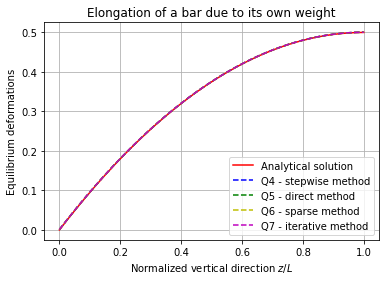

In [385]:
# Checking accuracy and calculation time

N = 10**3
C = 1/N**2

x = np.linspace(0, 1, N)

X4 = inv_densemat(N, C)
X5 = dsolve_densemat(N, C)
X6 = dsolve_sparsemat(N, C)
X7 = itsolve_sparsemat(N, C)

print("Verification accuracy")
plt.plot(x, x-.5*x**2, 'r', label = 'Analytical solution')

plt.plot(x, X4, 'b--', label = 'Q4 - stepwise method')
plt.plot(x, X5, 'g--', label = 'Q5 - direct method')
plt.plot(x, X6, 'y--', label = 'Q6 - sparse method')
plt.plot(x, X7, 'm--', label = 'Q7 - iterative method')

plt.title("Elongation of a bar due to its own weight")
plt.xlabel("Normalized vertical direction $z/L$")
plt.ylabel("Equilibrium deformations")

plt.grid('True')
plt.legend(loc = 4)

In [386]:
N = 5000
C = 1/N**2

print("Option 1: create a dense matrix and inverse it")
%timeit inv_densemat(N, C)

print("\nOption 2: create a dense matrix and use a direct solver")
%timeit dsolve_densemat(N, C)

print("\nOption 3: create a sparse matrix and use a direct solver")
%timeit dsolve_sparsemat(N, C)

print("\nOption 4: create a sparse matrix and use an iterative solver")
%timeit itsolve_sparsemat(N, C)

Option 1: create a dense matrix and inverse it
2.54 s ± 204 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Option 2: create a dense matrix and use a direct solver
1.09 s ± 50 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Option 3: create a sparse matrix and use a direct solver
2.49 ms ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Option 4: create a sparse matrix and use an iterative solver
1.34 ms ± 94.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Interlude on matrix factorization

Matrix decomposition methods (also known as factorization methods) are used to implement efficient algorithms. At least three of them are commonly used in scientific computing: 

- The pivoted lower-upper (LU) decomposition, very useful to solve MX = B for a lot of different B's.
- The eigendecomposition of real symmetric matrices
- The singular value decomposition (SVD), a generalization in some sense of 2. used to extract information from datasets, to understand the main underlying processes and to get an accurate approximate of a matrix with limited storage space.

#### The pivoted LU decomposition

Every nonsingular square matrix M is the product of three special matrices, 

$$M=PLU$$

where P is a permutation matrix, L lower triangular with unit diagonal elements, and U upper triangular. The computation of such a decomposition requires a large number of operations, but once it is done we can solve hundreds of systems of equations of the form MX=B at a much cheaper cost. For instance, consider the following set of equations,

\begin{align}
2x+y-z &= 1,\\
x-2y+3z &= 1,\\
2x+3y+z &= 1.\\
\end{align}

It is of the form MX = B, with

$$ M =  \begin{pmatrix} 2 & 1 & -1 \\ 1 & -2 & 3 \\ 2 & 3 & 1 \end{pmatrix}=  \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} \times \begin{pmatrix} 1 & 0 & 0 \\ .5 & 1 & 0 \\ 1 & -.8 & 1 \end{pmatrix} \times   \begin{pmatrix} 2 & 1 & -1 \\ 0 & -2.5 & 3.5 \\ 0 & 0 & 4.8 \end{pmatrix}, ~~~ X = \begin{pmatrix} x \\ y\\z \end{pmatrix}, ~~~ B = \begin{pmatrix} 1 \\ 1\\1 \end{pmatrix}. $$

In this case, P is the identity matrix. To compute X, we perform two substitutions instead of Gaussian elimination:

1. Define $\tilde{X}=UX$ such that $LUX=B$ reduces to $L \tilde{X} = B$ and solve for $\tilde{X}$, 

\begin{align}
\tilde{x} &= 1,\\
.5 \tilde{x}+ \tilde{y} &= 1,\\
\tilde{x} - .8\tilde{y} +\tilde{z}&= 1,\\
&\Rightarrow \tilde{x}=1, \tilde{y}=.5, \tilde{z}=.4.
\end{align}

2. Solve $UX = \tilde{X}$ for $X$, 

\begin{align}
4.8 z = \tilde{z}&=.4\\
-2.5 y + 3.5 z = \tilde{y}&=.5\\
2x+y-z = \tilde{x}&=1\\
&\Rightarrow x\simeq.6, y\simeq -.08, z\simeq.08.
\end{align}

The *SciPy* functions ```scipy.linalg.lu_factor``` computes the pivoted LU decomposition of a matrix, and ```scipy.linalg.lu_solve``` is a direct solver using the given pivoted LU decomposition of M.

### Exercise 5: LU decomposition for sparse matrices

We reconsider the system introduced before and sketched below.

<img src="add_files/TP3_3.png"  width="300" height="300" />

Recall that the equilibrium deformations ξ<sub>n</sub> are given by 
\begin{align}
2\xi_0 - \xi_1 &= C\\
- \xi_{n+1} + 2 \xi_n - \xi_{n-1} &= C&n \in [1,N-2]\\
\xi_{N-1} - \xi_{N-2} &= C
\end{align}

with C=mg/k. Thereafter, we set m=N<sup>-1</sup>, g=10 and k=10N such that C=N<sup>-2</sup>. The code you wrote to answer Q6 of exercise 4 defines Q as a sparse matrix, B as an array and solves for X with a direct solver (the fastest option for the values of N considered below). We now want to compute the total elongation of the bar ξ<sub>N-1</sub> when an additionnal mass m'=10 is attached depending on its attachment point, e.g., for N=5, the total elongation of the five following bars

<img src="add_files/TP3_4.png"  width="500" height="500" />


1. Create a function ```elong_plot_dir(N)``` that returns the total elongation as a function of the index i of the point-like particle the mass m' is attached to (i ranges from 0 to N-1) using a direct solver.
2. Create a function ```elong_plot_LU(N)``` that returns the total elongation as a function of i using a LU decomposition of Q ([have a look at the *SciPy* linear algebra reference guide](https://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.linalg.html)).
3. Compare the speed of these two options with ```%timeit``` for N=10,100,1000.

In [424]:
def elong_plot_dir(N):

    m   = 1/N; g = 10; k = 10*N;
    m_p = 10
    
    # Sparse matrix Q
    Q = -sps.eye(N, k=1) +2*sps.eye(N, k=0) -sps.eye(N, k=-1)
    Q[N-1, N-1] = 1
    sol = np.empty(N)

    # We work on B where we piecewisely add a mass to index i, 
    # i.e. the mass is added, we then calculate solution, 
    # then we recreate B before adding mass to an other 
    # position and solving again, and so on
    
    for ind in range(N):
        B        = np.linspace(1, 1, N)*(m*g/k)
        B[ind]  += m_p*g/k
        sol[ind] = linsolve.spsolve(Q, B)[N-1]
    return sol

In [425]:
def elong_plot_LU(N):

    m   = 1/N; g = 10; k = 10*N;
    m_p = 10
    
    # Sparse matrix Q
    Q = -sps.eye(N, k=1) +2*sps.eye(N, k=0) -sps.eye(N, k=-1)
    Q[N-1, N-1] = 1
    
    function_LU = factorized(Q)
    sol = np.empty(N)

    for ind in range(N):
        B        = np.linspace(1, 1, N)*(m*g/k)
        B[ind]  += m_p*g/k
        sol[ind] = function_LU(B)[N-1]
    return sol

In [426]:
# Kx = F 

for N in [10, 100, 1000]:
    print("\nDirect solver, N =", N)
    %timeit elong_plot_dir(N)
    
    print("LU decomposition, N =", N)
    %timeit elong_plot_LU(N)


Direct solver, N = 10
1.83 ms ± 19.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
LU decomposition, N = 10


C:\Users\vltn0\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


1.49 ms ± 49.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Direct solver, N = 100
13.4 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
LU decomposition, N = 100
5.45 ms ± 32 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Direct solver, N = 1000
393 ms ± 47.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
LU decomposition, N = 1000
70.8 ms ± 5.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Exercise 6:  eigenvalues and eigenvectors

Another typical class of problems in mechanics consists in computing the eigenmodes and eigenfrequencies of a vibrating structure, i.e., in carrying out a modal analysis. This can be done both experimentally (e.g., on real small scale airplanes) and/or numerically. Although we intend to compute the eigenmodes of systems with hundreds of more degrees of freedom, the following example sketches the method with only two point-like particles of mass m connected by springs.


<img src="add_files/TP3_5.png"  width="350" height="350" />

The dynamics is given by the following two ordinary differential equations, 

\begin{align}
m \ddot{x}_A &= - k_1 (x_A-\ell) + k_2 (x_B-x_A-\ell),\\
m \ddot{x}_B &= - k_1 (x_B-2\ell) + k_2 (x_A-x_B+\ell).\\
\end{align}

and therefore reads 

$$M \ddot{X} + K X = F,~~~~~~~~~~~~~~ M = m \begin{pmatrix} 1 & 0  \\ 0 & 1 \end{pmatrix}, ~~ K = \begin{pmatrix}  k_1+k_2 & -k_2 \\ -k_2 & k_1+k_2  \end{pmatrix}, ~~F = \begin{pmatrix}(k_1-k_2)\ell \\ (2k_1+k_2)\ell \end{pmatrix}, ~~ X(t) = \begin{pmatrix} x_A(t) \\ x_B(t) \end{pmatrix} $$

we first find the equilibrium position, 

$$X_\mathrm{eq} = \begin{pmatrix} \ell  \\ 2\ell \end{pmatrix}, $$

then define 

$$X(t) = X_\mathrm{eq} + \mathrm{Re} \left(\delta X e^{i\omega t}\right) \longrightarrow \delta X (\omega^2M-K)=0 \longleftrightarrow Q \delta X = \omega^2 \delta X, ~~~~~ Q = KM^{-1}=\frac{1}{m}\begin{pmatrix}  k_1+k_2 & -k_2 \\ -k_2 & k_1+k_2  \end{pmatrix} $$

One way to compute the natural frequencies is to set det(Mω<sup>2</sup>-K)=0, hence

$$\mathrm{det} \begin{pmatrix} m\omega^2-(k_1+k_2) & k_2  \\ k_2 & m\omega^2-(k_1+k_2) \end{pmatrix} = \left[m\omega^2 - k_1\right]\times \left[m \omega^2- k_1-2k_2 \right]=0,$$

then compute $\delta X$ for each solution of this equation. Another possibility is to recall that given a matrix Q, a non-zero vector X such that QX = λX is an eigenvector, and λ is the (possibly complex-valued) corresponding eigenvalue. Therefore, the natural frequencies are directly related to the eigenvalues of Q, and the structure of the normal modes to the eigenvectors of Q. Numerically, the function ```np.linalg.eig``` is used to compute both the eigenvalues and the eigenvectors (for sparse matrices, have a look at ```sp.linalg.eigs``` and ```sp.linalg.eigsh```).

1. For m=2.5, k<sub>1</sub>=2 and k<sub>2</sub>=3, generate the matrix Q then compute its eigenvalue and eigenvector. Check that the eigenvalues ω<sup>2</sup> match the theoretical prediction derive above. 

2. For an arbitrary amplitude of oscillation, plot the motion of both masses on a single graph for the first mode, then for the second mode. Which mode is the so-called *antisymmetric mode* ? and the *symetric mode* ?

#### 1

In [450]:
# Eigenvalues / eigenvectors

# Data
m = 2.5
k1 = 2
k2 = 3

Q = np.array([[k1+k2, -k2], [-k2, k1+k2]])/m

lam, w = np.linalg.eig(Q)

print("Checking for reliability eigenvalues :")
print("\nTheoretically, λ = %.2f and %.2f" %(k1/m, (k1+2*k2)/m))
print("Numerrically,  λ = %.2f and %.2f" %(lam[1], lam[0]))

Checking for reliability eigenvalues :

Theoretically, λ = 0.80 and 3.20
Numerrically,  λ = 0.80 and 3.20


#### 2

In [458]:
print(np.transpose(w[1,:]))
print(w[1,:])

[-0.70710678  0.70710678]
[-0.70710678  0.70710678]


The w are the vector position at which we have an oscillation. We thus switch between the two eigenvectors and look at how behaves the masses when in raisonnance.

2 possible cases as 2 eigenvectors : one symmetrical and the other asymmetrical (see signs).

<Figure size 1008x324 with 0 Axes>

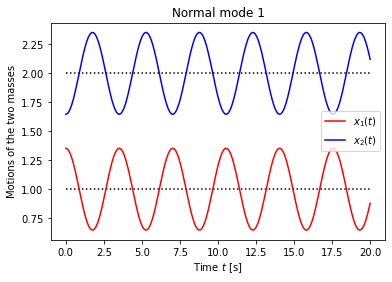

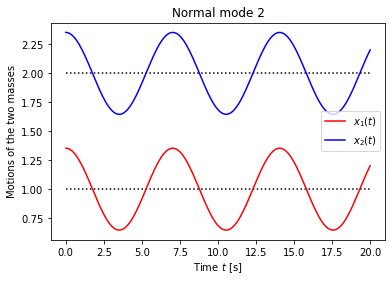

In [476]:
# Position = Xeq + Re(dX exp(iwt))

fig = plt.figure(figsize=(14,4.5))

l    = 1
x_eq = [l, 2*l]
A    = 0.5 # Amplitude

t = np.linspace(0, 20, 200)

for i in range(len(lam)):
    
    omega = np.sqrt(lam[i])
    
    # Position of the masses
    x_1 = x_eq[0] + A*w[0,i]*np.cos(omega*t)
    x_2 = x_eq[1] + A*w[1,i]*np.cos(omega*t)
    
    plt.figure()
    
    plt.plot(t, l*np.ones(len(t)), ':k')
    plt.plot(t, 2*l*np.ones(len(t)), ':k')
    plt.plot(t, x_1, 'r', label='$x_1(t)$')
    plt.plot(t, x_2, 'b', label='$x_2(t)$')

    plt.title("Normal mode " + str(i+1))

    plt.xlabel("Time $t$ [s]")
    plt.ylabel("Motions of the two masses")
    
    plt.legend(loc = 5)
    
    plt.show()

### Third test: normal modes of a chain of coupled oscillators

Create a new Jupyter Notebook and save it as *firstname_lastname_TEST3.ipynb*. In this notebook, write a title and  answer the following questions.

**This .ipynb file will have to be uploaded on Moodle by Monday, October 26, 2020 at 10:30am**

**It will be rated out of 10 (this course unit being rated out of 100)**

We consider N identical particles of mass m on a line, with each particle bound to its neighbors by a spring of stiffness k and rest length ℓ. 

<img src="add_files/TP3_6.png"  width="450" height="450" />

We denote the position of the i<sup>th</sup> particle by x<sub>i</sub>=(n+1) ℓ + ξ<sub>i</sub> and assume periodic boundary conditions (x<sub>N</sub>=x<sub>0</sub>). The dynamics of the displacements is


\begin{align}
m \ddot{\xi}_0 &= k (\xi_1 - 2\xi_0 + \xi_{N-1}) \\
m \ddot{\xi}_i &= k (\xi_{i+1} - 2\xi_i + \xi_{i-1})&i \in [1, N-2] \\
m \ddot{\xi}_{N-1} &= k (\xi_{0} - 2\xi_{N-1} + \xi_{N-2})
\end{align}

1. Show that each normal mode obeys an equation of the form QX = ω<sup>2</sup>X, where ω is the natural (angular) frequency, and define Q as a dense matrix.

2. For N=10 and k=m=1, compute the normal modes and natural frequencies and sort them by eigenvalue (*Hint*: use ```np.argsort```)

3. Compare the natural frequencies to their theoretical values of

$$ \omega_n = \sqrt{\frac{4k}{m}} \left \vert \sin \left( \frac{n \pi}{N} \right) \right \vert $$

4. Plot the structure of the modes of lowest frequency (gravest mode) and of highest frequency.

We now turn to a large chain of oscillators and chose N=1000.

5. Plot all the natural frequencies on a single graph to evidence the fact that they span a full range between 0 and  ω<sub>max</sub> = 2.

6. We consider several ways of computing the ten modes of highest frequency. Using ```%timeit```, compare the execution times of :

    1. the *NumPy* eigenvalue solver ```np.linalg.eig```
    2. the *NumPy* eigenvalue solver for real symmetric matrices ```np.linalg.eigh```
    3. the *SciPy* eigenvalue solver for sparse real symmetric matrices ```sp.sparse.linalg.eigsh``` (use ω<sub>max</sub><sup>2</sup> as a guess).

This chain of N=1000 particles is now forced: an external force **<span>F**<sub>ext</sub>= Fcos(ωt)  **<span>e**<sub>x</sub> acts on the 501<sup>th</sup> particle *only* (denoted by x<sub>500</sub>)

7. Show that the steady-state solution of this problem is of the form Q'X = B.
8. Compute then plot this steady-state using sparse matrices for F=1 and two values of ω: one below ω<sub>max</sub> and the other above it.
9. Do the same, but in the presence of an additionnal linear friction force acting of every particle.

#### 1


$$kQX = mX \\
\Rightarrow QX = \omega^2X 
$$


with 
$$Q = \begin{pmatrix} 2 & -1 & 0 & 0 & 0  \\ -1 & 2 & -1 & 0 & 0 \\ 0 & -1 & 2 & -1 & 0 \\ 0 & 0 & -1 & 2 & -1 \\ 0 & 0 & 0 & -1 & 2 \end{pmatrix}$$

#### 2

In [564]:
# Eigenvalues / eigenvectors

# Data
N = 10
m = k = 1

# -----------------------------------------------------

# Building matrix Q
Q = -np.eye(N, k=1) +2*np.eye(N, k=0) - np.eye(N, k=-1)

# Associated eigenvalues and eigenvectors
lam, w = np.linalg.eig(Q)

ind = np.argsort(lam)

lam = lam[ind]
w   = w[ind]
print("Sorted eigenvalues : ")
print(lam)

Sorted eigenvalues : 
[0.08101405 0.31749293 0.69027853 1.16916997 1.71537032 2.28462968
 2.83083003 3.30972147 3.68250707 3.91898595]


#### 3 - accuracy

[1.12099824 1.58533092 1.94162591 2.24199649 2.50662827 2.7458737
 2.96588257 3.17066184 3.36299473 3.5449077 ]


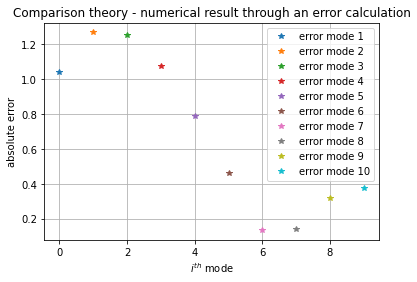

In [565]:
n = np.array([k for k in range(1, N+1)])

w_theory = np.empty(N)

for i in range(len(n)):
    w_theory[i] = np.sqrt(4*k/m) * np.abs(np.sqrt(np.dot(n[i], np.pi)/N))

error = w_theory - lam

print(w_theory)

for i in range(N):
    plt.plot(i, np.abs(error[i]), '*', label = 'error mode %d' %(i+1))
    
    plt.title("Comparison theory - numerical result through an error calculation")
    plt.xlabel("$i^{th}$ mode")
    plt.ylabel("absolute error")

    plt.legend()
    
    plt.grid('True')

#### 4 - Modes' shape

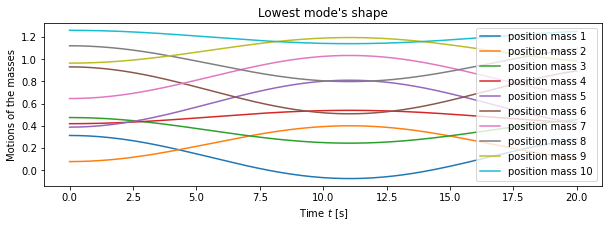

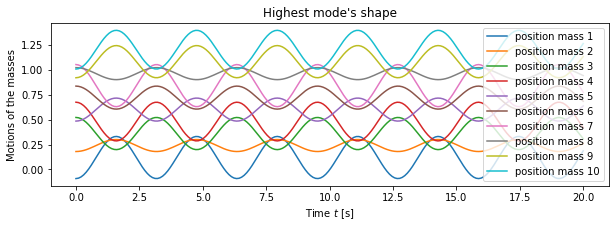

In [589]:
fig = plt.figure(figsize=(10,3))

# Data
N = 10
l = 0.12
A = 0.5 # Amplitude

# Time vector
t = np.linspace(0, 20, 200)

# Equilibrium position
x_eq = np.array([[l*k] for k in range(1, N+1)])

# ---------------------------------------------

# Position of the masses
x = np.empty(N)

for i in range(N):
    x_lowest  = x_eq[i] + A*w[i,0]*np.cos(np.sqrt(lam[0])*t)

    plt.plot(t, x_lowest, '', label = 'position mass %d' %(i+1))
       
    plt.title("Lowest mode's shape")
    plt.xlabel("Time $t$ [s]")
    plt.ylabel("Motions of the masses")

    plt.legend(loc = 5)

# ---------------------------------------------

fig = plt.figure(figsize=(10,3))

# ---------------------------------------------

for i in range(N):
    x_highest = x_eq[i] + A*w[i,-1]*np.cos(np.sqrt(lam[-1])*t)

    plt.plot(t, x_highest, '', label = 'position mass %d' %(i+1))
    
    plt.title("Highest mode's shape")
    plt.xlabel("Time $t$ [s]")
    plt.ylabel("Motions of the masses")

    plt.legend(loc = 5)


We now turn to a large chain of oscillators and chose N=1000.

5. Plot all the natural frequencies on a single graph to evidence the fact that they span a full range between 0 and  ω<sub>max</sub> = 2.

6. We consider several ways of computing the ten modes of highest frequency. Using ```%timeit```, compare the execution times of :

    1. the *NumPy* eigenvalue solver ```np.linalg.eig```
    2. the *NumPy* eigenvalue solver for real symmetric matrices ```np.linalg.eigh```
    3. the *SciPy* eigenvalue solver for sparse real symmetric matrices ```sp.sparse.linalg.eigsh``` (use ω<sub>max</sub><sup>2</sup> as a guess).

#### 5

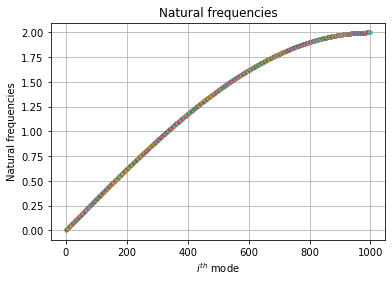

In [617]:
N = 1000

# Building matrix Q
Q = -np.eye(N, k=1) +2*np.eye(N, k=0) - np.eye(N, k=-1)

lam, w = np.linalg.eig(Q)

# Sorting eigenvalues/eigenvectors
ind = np.argsort(lam)

lam = lam[ind]
w   = w[ind]

# -----------------------------------------------------

for i in range(N):
    plt.plot(i, np.sqrt(lam[i]), '.')
    
    plt.title("Natural frequencies")
    plt.xlabel("$i^{th}$ mode")
    plt.ylabel("Natural frequencies")
    
    plt.grid('True')

#### 6

In [618]:
Q = -np.eye(N, k=1) +2*np.eye(N, k=0) - np.eye(N, k=-1)

print("Option 1: eigenvalues solver for dense matrix")
%timeit np.linalg.eig(Q)

print("\nOption 2: eigenvalues solver for real symmetric matrices")
%timeit np.linalg.eigh(Q)

print("\nOption 3: eigenvalues solver for sparse real symmetric matrices")
Q = -sps.eye(N, k=1) +2*sps.eye(N, k=0) - sps.eye(N, k=-1)

%timeit eigsh(Q)

Option 1: eigenvalues solver for dense matrix
894 ms ± 46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Option 2: eigenvalues solver for real symmetric matrices
82 ms ± 905 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Option 3: eigenvalues solver for sparse real symmetric matrices
568 ms ± 26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



This chain of N=1000 particles is now forced: an external force **<span>F**<sub>ext</sub>= Fcos(ωt)  **<span>e**<sub>x</sub> acts on the 501<sup>th</sup> particle *only* (denoted by x<sub>500</sub>)

7. Show that the steady-state solution of this problem is of the form Q'X = B.
8. Compute then plot this steady-state using sparse matrices for F=1 and two values of ω: one below ω<sub>max</sub> and the other above it.
9. Do the same, but in the presence of an additionnal linear friction force acting of every particle.

#### 7

Steady case : Kq = F
    
As we add a mass we will affect the $500^{th}$ particule, and so affect both q and F in the above equality.

$$F \rightarrow \begin{pmatrix} mg \\ mg \\ ... \\ mg \\ mg \end{pmatrix} + \begin{pmatrix} 0 \\ ... \\ Fcos(wt) \\ ... \\ 0 \end{pmatrix}$$

and $$q \rightarrow \begin{pmatrix} x_1 - x_{eq_1} \\ x_2 - x_{eq_2} \\ ... \\ x_{N-1} - x_{eq_{N-1}} \\ x_{N} - x_{eq_{N}} \end{pmatrix}$$

We as well keep Q as defined for such a system before and we have eventually :

$$Qq = \frac{1}{k}\begin{pmatrix} mg \\ mg \\ ... \\ mg + Fcos(wt) \\ ... \\ mg \\ mg \end{pmatrix} = B$$

#### 8 - Steady state through sparse matrix

In [672]:
def elong_plot_LU(N):

    m   = 1; g = 10; k = 10*N;
    m_p = 10
    
    # -------------------------------------------------------
    
    # Sparse matrix Q
    Q = -sps.eye(N, k=1) +2*sps.eye(N, k=0) - sps.eye(N, k=-1)
    Q[N-1, N-1] = 1
    w, vect = eigsh(Q)

    # Sorting eigenvalues/eigenvectors
    ind = np.argsort(w)

    w    = lam[ind]
    vect = vect[ind]

    # We consider 2 modes
    w_1 = w[-1] + 1 # netural frequency greater than w_max
    w_2 = w[-1] - 1 # netural frequency lower   than w_max

    # -------------------------------------------------------

    function_LU = factorized(Q)
    sol = np.empty(N)

    for ind in range(N):
        B        = np.linspace(1, 1, N)*(m*g/k) + np.linspace(1, 1, N)*F*cos(w*t)
        B[ind]  += m_p*g/k
        sol[ind] = function_LU(B)[N-1]
    return sol

C:\Users\vltn0\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\vltn0\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


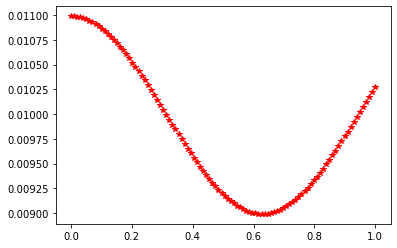

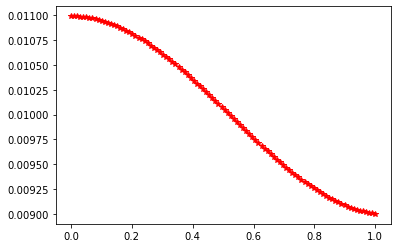

In [697]:
# Sparse matrix and 2 modes

F = 1 # intensity F*cos(wt)
g = 10

N  = 1000
Nt = 100
t  = np.linspace(0, 1, Nt)

m = 1/N; k = N

# -------------------------------------------------------
    
# Sparse matrix Q
Q = -sps.eye(N, k=1) +2*sps.eye(N, k=0) - sps.eye(N, k=-1)
w, vect = eigsh(Q)

# Sorting eigenvalues/eigenvectors
ind = np.argsort(w)

w    = lam[ind]
vect = vect[ind]

# We consider 2 modes
w_1 = w[-1] + 1 # natural frequency greater than w_max
w_2 = w[-1] - 1 # natural frequency lower   than w_max

# -------------------------------------------------------

# w_1 > w_max

function_LU = factorized(Q)
sol = np.empty(N)

F_m = np.ones([N, Nt])*(m*g/k)
F_m[500,:] += (F/k)*np.cos(w_1*t)

sol = function_LU(F_m)
plt.plot(t, sol[1,:], 'r*')

# -------------------------------------------------------

plt.figure()

# w_2 < w_max

function_LU = factorized(Q)
sol = np.empty(N)

F_m = np.ones([N, Nt])*(m*g/k)
F_m[500,:] += (F/k)*np.cos(w_2*t)

sol = function_LU(F_m)

plt.plot(t, sol[1,:], 'r*')

#### 9 - Linear friction force

C:\Users\vltn0\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
C:\Users\vltn0\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


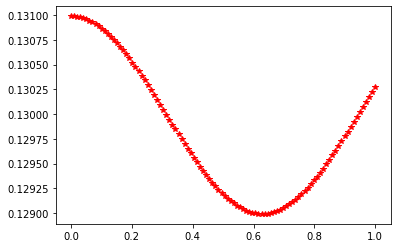

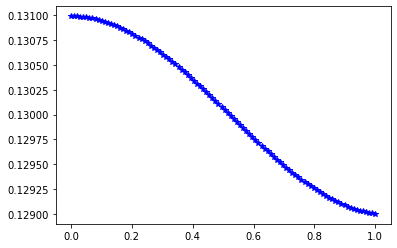

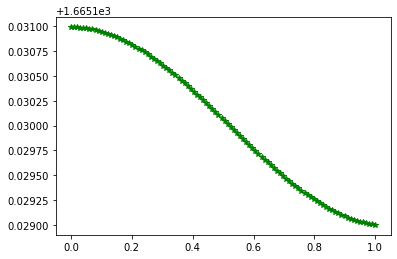

In [724]:
# Friction increasing with x

N    = 10**3
mu   = 5*10**-3
Newt = 1

F_friction = np.array([mu*Newt*x for x in range(N)])

x_eq = np.array([k*l for k in range(N)])

# -------------------------------------------------------

# w_1 > w_max

function_LU = factorized(Q)
sol = np.empty(N)

F_m = np.ones([N, Nt])*(m*g/k)
F_m[500,:] += (F/k)*np.cos(w_1*t)

sol = function_LU(F_m)

for i in range(Nt):
    sol[:,i] += x_eq # Position of every components

plt.plot(t, sol[1,:], 'r*')

# -------------------------------------------------------

plt.figure()

# w_2 < w_max

function_LU = factorized(Q)
sol = np.empty(N)

F_m = np.ones([N, Nt])*(m*g/k)
F_m[500,:] += (F/k)*np.cos(w_2*t)

sol = function_LU(F_m)

for i in range(Nt):
    sol[:,i] += x_eq # Position of every components

plt.plot(t, sol[1,:], 'b*')

# -------------------------------------------------------
# -------------------------------------------------------

plt.figure()

# w_2 < w_max + Friction

for i in range(Nt):
    F_m[:,i] += F_friction

sol = function_LU(F_m)

for i in range(Nt):
    sol[:,i] += x_eq # Position of every components

plt.plot(t, sol[1,:], 'g*')


To have add linear friction, with the friction increasing with the x, led obviously to a greater displacement over time.
One can switch between N points to get the position of a specific mass throughout time. Recall that lower the mass, bigger the displacement.

For what is up to the difference of case $\omega > \omega_{max}$ and $\omega < \omega_{max}$, we see that in the case $\omega < \omega_{max}$ the masses behaves in phase, while for the case $\omega > \omega_{max}$, some oscillations due to antisymetric relation might take place.